In [51]:
##header library

%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df1 = pd.read_csv("D:\\aaa\\Data Mining\\UAS\\2006836_Atta-Arrezie-Kurnia_UAS_DatMin\\dataset_uas_datamining_jan_23\\pmi.csv")

In [53]:
df1[:]

,prov,tahun,kategori_pmi
0,ACEH,2022,TINGGI
1,SUMATERA UTARA,2022,TINGGI
2,SUMATERA BARAT,2022,TINGGI
3,RIAU,2022,TINGGI
4,JAMBI,2022,TINGGI
...,...,...,...
437,SULAWESI BARAT,2010,SANGAT RENDAH
438,MALUKU,2010,SEDANG
439,MALUKU UTARA,2010,SEDANG
440,PAPUA BARAT,2010,SANGAT RENDAH


### Proses EDA
dataset yang digunakan merupakan data ketidak cukupan pangan dalam provinsi dan data proporsirt dengan akses pelayanan dasar dalam provinsi
data tersebut digunakan karena dalam mengukur keberhasilan dalam upaya membangun kualitas hidup manusia (masyarakat/penduduk), kecukupan pangan dan kemudahan akses untuk pelayanan dasar sangat diperlukan.

In [54]:
df2 = pd.read_csv("D:\\aaa\\Data Mining\\UAS\\2006836_Atta-Arrezie-Kurnia_UAS_DatMin\\dataset_uas_datamining_jan_23\\ketidak_cukupan_pangan_prov.csv")
df3 = pd.read_csv("D:\\aaa\\Data Mining\\UAS\\2006836_Atta-Arrezie-Kurnia_UAS_DatMin\\dataset_uas_datamining_jan_23\\proporsi_rt_akses_layanan_dasar.csv")

In [55]:
df2[:]

,tahun,pct_tdk_cukup_pangan,prov
0,2021,6.90,ACEH
1,2021,6.33,SUMATERA UTARA
2,2021,6.02,SUMATERA BARAT
3,2021,10.61,RIAU
4,2021,9.25,JAMBI
...,...,...,...
170,2017,26.57,MALUKU
171,2017,34.05,MALUKU UTARA
172,2017,27.22,PAPUA BARAT
173,2017,34.27,PAPUA


In [56]:
df3[:]


,tahun,proporsi_rt_akses_layanan_dasar,prov
0,2021,69.31,ACEH
1,2021,68.22,SUMATERA UTARA
2,2021,82.09,SUMATERA BARAT
3,2021,74.93,RIAU
4,2021,73.41,JAMBI
...,...,...,...
100,2019,75.60,MALUKU
101,2019,72.81,MALUKU UTARA
102,2019,69.47,PAPUA BARAT
103,2019,35.55,PAPUA


In [57]:
df_merge = pd.merge(df2, df3, how="left", on=["tahun", "prov"])
df_merge[:]

,tahun,pct_tdk_cukup_pangan,prov,proporsi_rt_akses_layanan_dasar
0,2021,6.90,ACEH,69.31
1,2021,6.33,SUMATERA UTARA,68.22
2,2021,6.02,SUMATERA BARAT,82.09
3,2021,10.61,RIAU,74.93
4,2021,9.25,JAMBI,73.41
...,...,...,...,...
170,2017,26.57,MALUKU,NaN
171,2017,34.05,MALUKU UTARA,NaN
172,2017,27.22,PAPUA BARAT,NaN
173,2017,34.27,PAPUA,NaN


In [58]:
df_merge["pct_tdk_cukup_pangan"].value_counts(dropna = False)

8.71     3
10.18    2
8.58     2
7.47     2
9.16     2
        ..
7.39     1
11.80    1
9.77     1
30.75    1
9.25     1
Name: pct_tdk_cukup_pangan, Length: 166, dtype: int64

In [59]:
df_merge["tahun"].value_counts(dropna = False)

2017    35
2018    35
2019    35
2020    35
2021    35
Name: tahun, dtype: int64

 data ketidak cukupan pangan berada dalam rentang 2017 sampai 2021

In [60]:
df_merge.isnull().sum()

tahun                               0
pct_tdk_cukup_pangan                0
prov                                0
proporsi_rt_akses_layanan_dasar    70
dtype: int64

ternyata ada yang kosong di proporsi rt, cek menggunakan loc untuk setiap tahun. dicurigai bahwa data proporsi tidak ada dari tahun 2017 sampai 2018

In [61]:
df_merge.loc[df_merge.tahun.isin([2017, 2018]),"proporsi_rt_akses_layanan_dasar"] 

105   NaN
106   NaN
107   NaN
108   NaN
109   NaN
       ..
170   NaN
171   NaN
172   NaN
173   NaN
174   NaN
Name: proporsi_rt_akses_layanan_dasar, Length: 70, dtype: float64

setelah di teliti ternyata memang tidak ada data untuk proprosi rt dari tahun 2017 sampai 2018, maka kita hanya menggunakan data dari tahun 2019 keatas

In [69]:
df_merge = df_merge.drop(df_merge[df_merge.tahun < 2019].index)

In [70]:
df_merge[:]

,tahun,pct_tdk_cukup_pangan,prov,proporsi_rt_akses_layanan_dasar
0,2021,6.90,ACEH,69.31
1,2021,6.33,SUMATERA UTARA,68.22
2,2021,6.02,SUMATERA BARAT,82.09
3,2021,10.61,RIAU,74.93
4,2021,9.25,JAMBI,73.41
...,...,...,...,...
100,2019,34.12,MALUKU,75.60
101,2019,35.81,MALUKU UTARA,72.81
102,2019,19.22,PAPUA BARAT,69.47
103,2019,38.21,PAPUA,35.55


In [71]:
df_merge["pct_tdk_cukup_pangan"].value_counts(dropna = False)

9.16     2
8.58     2
35.48    1
9.41     1
23.09    1
        ..
6.91     1
5.86     1
11.17    1
12.56    1
9.25     1
Name: pct_tdk_cukup_pangan, Length: 103, dtype: int64

In [85]:
df_merge = pd.merge(df1, df_merge, how="left", on=["tahun", "prov"])
df_merge[:]

,prov,tahun,kategori_pmi_x,kategori_pmi_y,pct_tdk_cukup_pangan,proporsi_rt_akses_layanan_dasar
0,ACEH,2022,TINGGI,TINGGI,NaN,NaN
1,SUMATERA UTARA,2022,TINGGI,TINGGI,NaN,NaN
2,SUMATERA BARAT,2022,TINGGI,TINGGI,NaN,NaN
3,RIAU,2022,TINGGI,TINGGI,NaN,NaN
4,JAMBI,2022,TINGGI,TINGGI,NaN,NaN
...,...,...,...,...,...,...
437,SULAWESI BARAT,2010,SANGAT RENDAH,SANGAT RENDAH,NaN,NaN
438,MALUKU,2010,SEDANG,SEDANG,NaN,NaN
439,MALUKU UTARA,2010,SEDANG,SEDANG,NaN,NaN
440,PAPUA BARAT,2010,SANGAT RENDAH,SANGAT RENDAH,NaN,NaN


karena kita hanya mengklasifikasi data dari tahun 2019 sampai 2021, maka hapus data diluar dari tahun tersebut

In [98]:
df_merge = df_merge.drop(df_merge[(df_merge.tahun < 2019)].index)
df_merge = df_merge.drop(df_merge[(df_merge.tahun > 2021)].index)

In [99]:
df_merge[:]

,prov,tahun,kategori_pmi_x,kategori_pmi_y,pct_tdk_cukup_pangan,proporsi_rt_akses_layanan_dasar
34,ACEH,2021,TINGGI,TINGGI,6.90,69.31
35,SUMATERA UTARA,2021,TINGGI,TINGGI,6.33,68.22
36,SUMATERA BARAT,2021,TINGGI,TINGGI,6.02,82.09
37,RIAU,2021,TINGGI,TINGGI,10.61,74.93
38,JAMBI,2021,TINGGI,TINGGI,9.25,73.41
...,...,...,...,...,...,...
131,SULAWESI BARAT,2019,SEDANG,SEDANG,6.79,80.77
132,MALUKU,2019,SEDANG,SEDANG,34.12,75.60
133,MALUKU UTARA,2019,SEDANG,SEDANG,35.81,72.81
134,PAPUA BARAT,2019,SEDANG,SEDANG,19.22,69.47


In [120]:
df_merge = df_merge.drop(['kategori_pmi_y'],axis=1) #buang atribut kategori_pmi_y karena duplikat

KeyError: "['kategori_pmi_y'] not found in axis"

In [122]:
df_merge.rename(columns = {'kategori_pmi_x':'kategori_pmi'}, inplace = True)

In [123]:
df_merge[:]

,prov,tahun,kategori_pmi,pct_tdk_cukup_pangan,proporsi_rt_akses_layanan_dasar
34,ACEH,2021,TINGGI,6.90,69.31
35,SUMATERA UTARA,2021,TINGGI,6.33,68.22
36,SUMATERA BARAT,2021,TINGGI,6.02,82.09
37,RIAU,2021,TINGGI,10.61,74.93
38,JAMBI,2021,TINGGI,9.25,73.41
...,...,...,...,...,...
131,SULAWESI BARAT,2019,SEDANG,6.79,80.77
132,MALUKU,2019,SEDANG,34.12,75.60
133,MALUKU UTARA,2019,SEDANG,35.81,72.81
134,PAPUA BARAT,2019,SEDANG,19.22,69.47


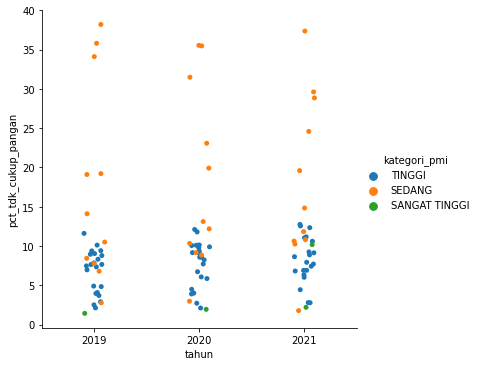

In [125]:
##melihat rentang kategori pmi pada setiap tahun untuk persentase ketidak cukupan pangan
sns.catplot(x="tahun", y="pct_tdk_cukup_pangan", hue="kategori_pmi", data=df_merge)

dilihat dari catplot diatas, ipm/pmi dgn kategori tinggi mempunyai persentase ketidak cukupan pangan berada di kisaran 1% - 15%, sedangkan ipm dengan kategori sangat tinggi berada di rentang atau kisaran 1%-10% yang artinya kecukupan pangan masyarakat dari prov dgn ipm tinggi dan sangat tinggi sebagian besar terpenuhi. Namun tidak menutup kemungkinan bahwa ipm dengan kategori sedang juga memiliki tingkat persentase ketidak cukupan pangan di kisaran 1% - 15%, walau tingkat ketidak cukupannya pangannya lebih menyebar di >15% 

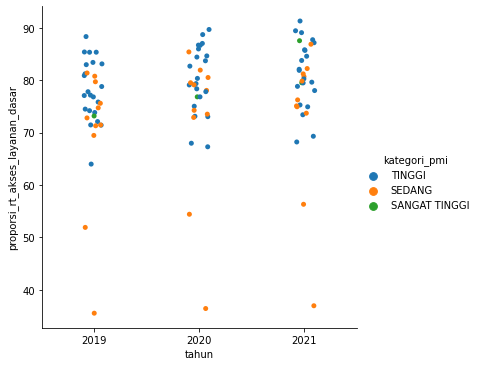

In [126]:
##melihat rentang kategori pmi pada setiap tahun untuk persentase propori akses pelayanan dasar tiap rt
sns.catplot(x="tahun", y="proporsi_rt_akses_layanan_dasar", hue="kategori_pmi", data=df_merge)

dilihat dari catplot diatas, untuk semua kategori ipm tiap provinsi memiliki proporsi akses pelayanan dasar yangcukup besar yaitu pada kisaran 70-90%, walau untuk kategori sedang masih mempunyai beberapa proporsi yang rendah bahkan menyentuh <40%

### Klasifikasi
####masih error

In [103]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_merge.kategori_pmi_x)
Y = le.transform(df_merge.kategori_pmi_x)

In [104]:
list(le.classes_)

['SANGAT TINGGI', 'SEDANG', 'TINGGI']

In [108]:
list(le.inverse_transform([1, 2, 0]))

['SEDANG', 'TINGGI', 'SANGAT TINGGI']

dilihat dari list diatas, pada rentang tahun 2019 sampai 2021 kategori pmi per provinsi hanya memiliki 3 kategori dari yang terendah yaitu "sedang", "tinggi", dan "sangat tinggi"

In [110]:
X = df_merge.drop("kategori_pmi_x",axis=1)

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=12)
import pickle


In [118]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=12)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

ValueError: could not convert string to float: 'KALIMANTAN TENGAH'